In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

items = pd.read_csv("./items.csv")
shops = pd.read_csv("./shops.csv")
train = pd.read_csv("./sales_train.csv")
test = pd.read_csv("./test.csv")
cat = pd.read_csv("./item_categories.csv")

# EDA

## 데이터 타입 정보

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


date 가 문자열이다...  

In [7]:
# date 를 datetime 형으로 변환 
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y") 
train["date"]

0         2013-01-02
1         2013-01-03
2         2013-01-05
3         2013-01-06
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2935849, dtype: datetime64[ns]

In [8]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [9]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [11]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


## train 데이터 프레임의 boxplot

### item_price

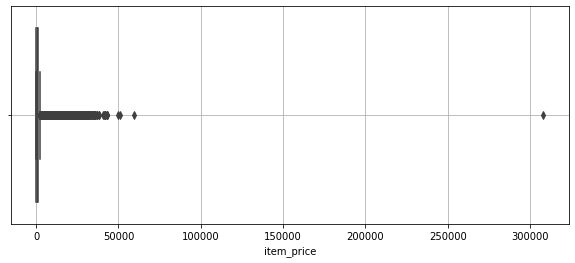

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_price)
plt.grid()

In [13]:
len(train[train["item_price"] >= 50000])

3

item_price값이 50000 이상인 행은 3개 이므로 제거 ..

In [14]:
train.drop(train[train["item_price"] >= 50000].index, axis = 0 , inplace=True)

## item_cnt_day

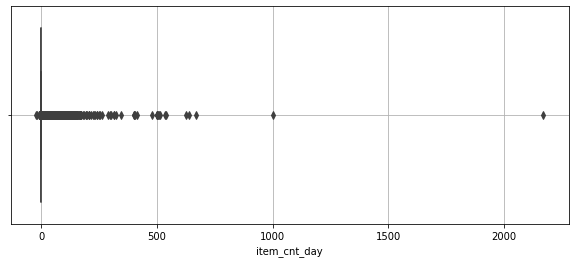

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)
plt.grid()

In [16]:
len(train[train["item_cnt_day"] >= 1000])

2

item_cnt_day값이 1000 이상인 행은 2개 이므로 제거 ..

In [17]:
train.drop(train[train["item_cnt_day"] >= 1000].index, axis = 0 , inplace=True)

# shops

In [18]:
# 특수문자가 많이 들어가 있다. 
shops.head(20)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [19]:
# 특수문자 제거  및 중복된 가게의 코드 확인 
import re


def clean_text(inputString):
    text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', inputString)
    return text_rmv
shops_names = shops["shop_name"].apply(clean_text)
shops_id = shops["shop_id"]
# 중복되는 이름 확인 

for i in list(zip(shops_names ,shops_id)):
    for j in list(zip(shops_names ,shops_id)):
        if (re.match('.*'+i[0]+'*.',j[0])) and (i[1]!= j[1]):
            print('code : ', i[1], ' and  ', j[1])
            


code :  10  and   11
code :  11  and   10
code :  39  and   40
code :  57  and   0
code :  58  and   1


In [20]:
#  중복된 코드 바꾸기 
train["shop_id"] = train["shop_id"].replace({0: 57, 1: 58, 11: 10, 40: 39})

#  item

# item_category

# Feature engineering

## 하루 총 매출 (income_per_days) 추가

In [21]:
# y = train['shop_id']
# x = train['item_price']
# plt.figure(figsize=(10,10))
# sns.barplot(x= x , y=y)
# plt.show()

pivot_for_check_dicount = train.pivot_table(index = ['item_id', 'date_seq'] , values = 'item_price')

for i  in range(len(pivot_for_check_dicount) -1):
    if  pivot_for_check_dicount.loc[i,:]['item_price'].nunique() >1:
        print( i+1 ,'번째 다른 값 있음')


KeyError: 'date_seq'

In [ ]:
pivot_for_check_dicount
# 가게별 판매가격이 다른 것이 있음 
# train['income_per_days'] = train['item_cnt_day'] * train['item_price']
# train['income_per_days'] = train['income_per_days']


## 날짜별 정렬을 위한 date_seq 추가

In [22]:
from sklearn.preprocessing import LabelEncoder
train.sort_values('date',inplace=True)
le = LabelEncoder()
train['date_seq'] = le.fit_transform(train['date'])



# 변수별 상관관계

In [23]:
# train_pivot_date_block_num = train.pivot_table(index = 'date_block_num' , values =  ,agg)
# plt.figure(figsize=(10,10))
# sns.pairplot(train_sample)

In [24]:
# drop shops&items not in test data
test_shops = test.shop_id.unique()
test_items = test.item_id.unique()
train = train[train.shop_id.isin(test_shops)]
train = train[train.item_id.isin(test_items)]

In [25]:
'train:', train.shape

('train:', (1230909, 7))

In [26]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_seq
110587,2013-01-01,0,42,5145,449.0,1.0,0
20963,2013-01-01,0,28,15584,999.0,1.0,0
106772,2013-01-01,0,37,2484,399.0,1.0,0
106752,2013-01-01,0,37,2416,449.0,1.0,0
18641,2013-01-01,0,28,3554,2199.0,2.0,0
...,...,...,...,...,...,...,...
2897410,2015-10-31,33,56,5039,1499.0,1.0,1033
2904640,2015-10-31,33,53,13159,299.0,1.0,1033
2929742,2015-10-31,33,24,19657,730.0,2.0,1033
2929741,2015-10-31,33,24,19656,1044.0,1.0,1033


In [32]:
#how=left (교집합)

items_test_merge = pd.merge(items,test, 
                            left_on = ['item_id'], right_on = ['item_id'])

In [33]:
items_train_merge = pd.merge(items,train, 
                            left_on = ['item_id'], right_on = ['item_id'])

In [35]:
items_test_merge

,item_name,item_id,item_category_id,ID,shop_id
0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,30,40,2587,5
1,007: КООРДИНАТЫ «СКАЙФОЛЛ»,30,40,7687,4
2,007: КООРДИНАТЫ «СКАЙФОЛЛ»,30,40,12787,6
3,007: КООРДИНАТЫ «СКАЙФОЛЛ»,30,40,17887,3
4,007: КООРДИНАТЫ «СКАЙФОЛЛ»,30,40,22987,2
...,...,...,...,...,...
214195,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,189177,46
214196,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,194277,41
214197,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,199377,44
214198,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,204477,39


In [52]:
items_train_merge

,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day
0,30,40,2013-02-12,1,22,399.0,2.0
1,30,40,2013-02-12,1,21,399.0,1.0
2,30,40,2013-02-12,1,50,399.0,1.0
3,30,40,2013-02-12,1,26,359.0,1.0
4,30,40,2013-02-12,1,46,399.0,2.0
...,...,...,...,...,...,...,...
1230904,22167,49,2015-10-26,33,42,299.0,1.0
1230905,22167,49,2015-10-28,33,6,299.0,1.0
1230906,22167,49,2015-10-29,33,12,299.0,1.0
1230907,22167,49,2015-10-31,33,42,299.0,1.0


In [43]:
items_test_merge.drop(['item_name', 'ID'], axis = 1)

,item_id,item_category_id,shop_id
0,30,40,5
1,30,40,4
2,30,40,6
3,30,40,3
4,30,40,2
...,...,...,...
214195,22167,49,46
214196,22167,49,41
214197,22167,49,44
214198,22167,49,39


In [50]:
items_train_merge.drop(['item_name','date_seq'], axis = 1 ,inplace=True)

In [53]:
items_train_merge.iloc[:, [0,1,3,4,5,6]]

,item_id,item_category_id,date_block_num,shop_id,item_price,item_cnt_day
0,30,40,1,22,399.0,2.0
1,30,40,1,21,399.0,1.0
2,30,40,1,50,399.0,1.0
3,30,40,1,26,359.0,1.0
4,30,40,1,46,399.0,2.0
...,...,...,...,...,...,...
1230904,22167,49,33,42,299.0,1.0
1230905,22167,49,33,6,299.0,1.0
1230906,22167,49,33,12,299.0,1.0
1230907,22167,49,33,42,299.0,1.0


In [55]:
items_train_merge.iloc[:, [0,1,3,4,5,6]].corr()

,item_id,item_category_id,date_block_num,shop_id,item_price,item_cnt_day
item_id,1.000000,0.453823,0.047323,0.022862,-0.159970,0.051844
item_category_id,0.453823,1.000000,0.004456,0.015867,-0.278428,0.030215
date_block_num,0.047323,0.004456,1.000000,0.008783,0.066841,-0.021855
shop_id,0.022862,0.015867,0.008783,1.000000,-0.024323,-0.010400
item_price,-0.159970,-0.278428,0.066841,-0.024323,1.000000,0.009359
item_cnt_day,0.051844,0.030215,-0.021855,-0.010400,0.009359,1.000000


In [56]:
items_train_merge_nodate = items_train_merge.iloc[:, [0,1,3,4,5,6]]

In [60]:
items_train_merge_nodate['total_item'] = items_train_merge_nodate.item_price * items_train_merge_nodate.item_cnt_day

In [61]:
items_train_merge_nodate

,item_id,item_category_id,date_block_num,shop_id,item_price,item_cnt_day,total_item
0,30,40,1,22,399.0,2.0,798.0
1,30,40,1,21,399.0,1.0,399.0
2,30,40,1,50,399.0,1.0,399.0
3,30,40,1,26,359.0,1.0,359.0
4,30,40,1,46,399.0,2.0,798.0
...,...,...,...,...,...,...,...
1230904,22167,49,33,42,299.0,1.0,299.0
1230905,22167,49,33,6,299.0,1.0,299.0
1230906,22167,49,33,12,299.0,1.0,299.0
1230907,22167,49,33,42,299.0,1.0,299.0


In [80]:
items_train_merge_nodate.corr(method = 'spearman')

,item_id,item_category_id,date_block_num,shop_id,item_price,item_cnt_day,total_item
item_id,1.000000,0.452530,0.050729,0.025058,-0.329635,0.033031,-0.322611
item_category_id,0.452530,1.000000,0.005533,0.021246,-0.446997,0.003545,-0.437021
date_block_num,0.050729,0.005533,1.000000,0.008664,0.080371,-0.051471,0.066563
shop_id,0.025058,0.021246,0.008664,1.000000,-0.047815,-0.005932,-0.046907
item_price,-0.329635,-0.446997,0.080371,-0.047815,1.000000,0.004528,0.965131
item_cnt_day,0.033031,0.003545,-0.051471,-0.005932,0.004528,1.000000,0.207270
total_item,-0.322611,-0.437021,0.066563,-0.046907,0.965131,0.207270,1.000000


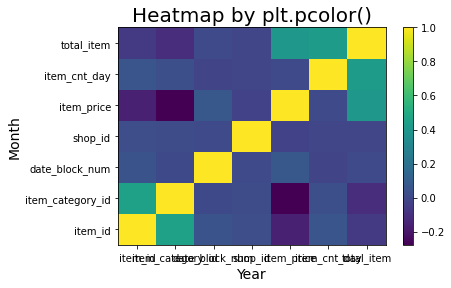

In [79]:
# heatmap by plt.pcolor()
plt.pcolor(items_train_merge_nodate.corr())
plt.xticks(np.arange(0.5, len(items_train_merge_nodate.corr().columns), 1), items_train_merge_nodate.corr().columns)
plt.yticks(np.arange(0.5, len(items_train_merge_nodate.corr().index), 1), items_train_merge_nodate.corr().index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()
plt.show()

In [69]:
pivot_test = \
items_train_merge_nodate.pivot_table(index = 'date_block_num' ,
                                    values = ['item_price','item_cnt_day'],
                                    aggfunc = 'sum')

In [73]:
pivot_test.reset_index().corr()

,date_block_num,item_cnt_day,item_price
date_block_num,1.000000,0.716913,0.788501
item_cnt_day,0.716913,1.000000,0.966408
item_price,0.788501,0.966408,1.000000


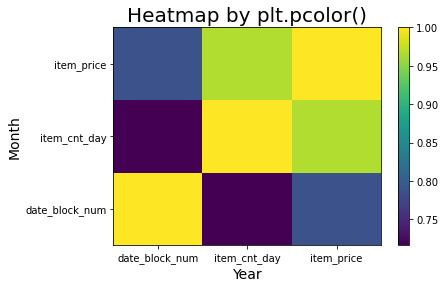

In [74]:
plt.pcolor(pivot_test.reset_index().corr())
plt.xticks(np.arange(0.5, len(pivot_test.reset_index().corr().columns), 1), pivot_test.reset_index().corr().columns)
plt.yticks(np.arange(0.5, len(pivot_test.reset_index().corr().index), 1), pivot_test.reset_index().corr().index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()
plt.show()